<a href="https://colab.research.google.com/github/vigneshlakshh/vigneshlakshh/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv",engine='python')
print(df.shape)
df.head(5)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['sentiment'].value_counts() 

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
df['senti']=df['sentiment'].map({'positive':1,'negative':0})
df.head()

,review,sentiment,senti
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [7]:
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [8]:
df['vector'] = df['review'].apply(lambda review: nlp(review).vector) 

In [9]:
df.head()

,review,sentiment,senti,vector
0,One of the other reviewers has mentioned that ...,positive,1,"[0.2444776, 0.019941758, 0.15359198, -0.137270..."
1,A wonderful little production. <br /><br />The...,positive,1,"[0.16746117, -0.021590881, 0.090280674, 0.0083..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[0.0699091, 0.12425062, 0.2107406, -0.10246685..."
3,Basically there's a family where a little boy ...,negative,0,"[0.13119352, 0.010334737, 0.097801216, -0.0748..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[0.26084697, 0.028746849, 0.08646768, -0.06552..."


In [10]:
from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.senti,
    test_size=0.2,
    random_state=2022
)  #Using 80/20 Split

In [11]:
X_train.shape

(40000,)

In [12]:
X_test.shape

(10000,)

In [13]:
X_train  

array([array([ 0.11712133,  0.02305273,  0.17052478, -0.04293274,  0.09563934,
              -0.13267864, -0.03501281, -0.03024652,  0.11233119,  0.08985726,
               0.20416628, -0.2089935 ,  0.00787368,  0.04347388, -0.01710206,
               0.06322994, -0.05440715, -0.00801413, -0.20536448, -0.10888942,
               0.09662248,  0.12464511, -0.02762269, -0.04143442,  0.00761847,
              -0.03643603,  0.08707584, -0.02308567, -0.26273692,  0.23385417,
              -0.13362472,  0.1488972 , -0.14514779, -0.01588277, -0.09541325,
               0.0804648 , -0.03604294, -0.16681643, -0.01540601,  0.22435944,
               0.2478402 ,  0.41423732,  0.02477771, -0.29061213, -0.11778229,
               0.15976003,  0.20285973,  0.20389077, -0.05034865,  0.1147118 ,
              -0.01644088, -0.07549083, -0.07635842,  0.12196292, -0.04762588,
              -0.01937373,  0.27104768, -0.0530624 , -0.07771766, -0.04526581,
              -0.04166964, -0.12425579, -0.01145377,

In [14]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [15]:
X_train_2d

array([[ 1.17121331e-01,  2.30527297e-02,  1.70524776e-01, ...,
        -2.65187830e-01,  1.26450941e-01, -3.76657367e-01],
       [ 1.30501792e-01, -3.02265864e-04,  1.11475393e-01, ...,
        -4.85373020e-01,  1.49339616e-01, -2.50930339e-01],
       [ 1.25038728e-01, -4.24637906e-02,  5.44464774e-02, ...,
        -2.00108647e-01, -3.79618369e-02, -1.69000968e-01],
       ...,
       [-5.32790944e-02, -7.75084272e-02,  4.19137359e-01, ...,
        -1.10661134e-01,  1.38168961e-01, -1.10323273e-01],
       [ 7.91926384e-02, -7.69683672e-03,  9.24950838e-02, ...,
        -3.67839426e-01,  1.02404490e-01, -2.82072008e-01],
       [ 7.36287683e-02,  6.96716532e-02,  1.59108669e-01, ...,
        -2.67215759e-01,  1.06178708e-01, -1.60871431e-01]], dtype=float32)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)                ##scaling to fit negative values


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [17]:
y_pred = clf.predict(scaled_test_embed)
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      5043
           1       0.61      0.63      0.62      4957

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



In [18]:
from  sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      5043
           1       0.63      0.58      0.61      4957

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.63     10000



In [20]:
from  sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(X_train_2d, y_train)
y_pred = model.predict(X_test_2d)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      5043
           1       0.69      0.71      0.70      4957

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



Text(69.0, 0.5, 'Truth')

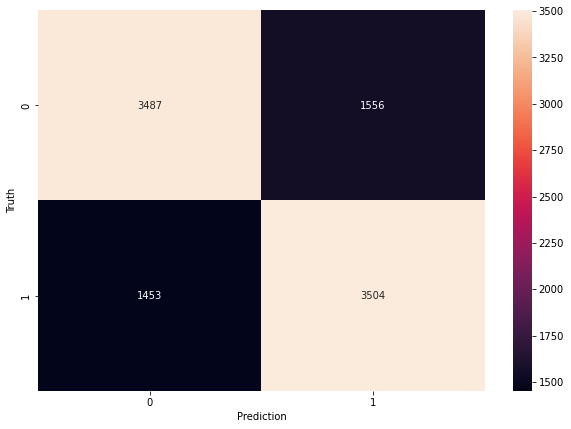

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')